### Web Scraping using Beautiful Soup
In this project, the top five resturants in the helsinki region are suggested based to the certain criterias such as 1) rating 2) reviews 3) distance from center  and 4) payment accept with card or not. The data are scrapped with beautiful soup  from  yelp website. You can find report file in github for better understanding.

In [58]:
#import necessary libraries
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
import time
import  re

In [675]:

# request to the yelp website
# collect url to each resturants
# 30 items in each page, and total 2 page, so iterate 2 times

base_url = 'https://www.yelp.com'
items_num =  ['0', '30']
total_url = [] #initialize for storing total url
total_data = [] # initialize for storing  resturant information

#Scrap each resturant url
for i in items_num:
    url = 'https://www.yelp.com/search?find_desc=Restaurants+-+Breakfast+%26+Brunch&find_loc=Helsinki,+Finland&start='+ i + '&cflt=breakfast_brunch&attrs=RestaurantsPriceRange2.1,RestaurantsPriceRange2.2,BusinessAcceptsCreditCards'
    source = request.urlopen(url) 
    soup = BeautifulSoup(source.read(),"html.parser" ) # creates beautiful soup object
    resturant_url = soup.find_all('a', {'class': 'nowrap'})  # extract without base url
    #total_url.append([base_url + l.get('href') for l in resturant_url])
    
    for l in resturant_url:
        total_url.append(base_url + l.get('href')) # concatenate base url with extracted url  
    time.sleep(1.5)
print (total_url)





['https://www.yelp.com/biz/fleuriste-helsinki?hrid=N5oCBxMdtTGQulGwrvA0FQ&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/sis-deli-ja-cafe-helsinki-2?hrid=NmlEi0zAoTe8cm08B8n7wg&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/caf%C3%A9-daja-helsinki?hrid=1PBB9N6DVCqLOgDqZsgjtQ&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/caf%C3%A9-engel-helsinki-2?hrid=x8zdapfION1IAdQZRrs-PA&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/la-torrefazione-helsinki?hrid=lH-pbE6mwsGkIzyyuwAqkg&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/moko-market-ja-cafe-helsinki?hrid=Vq6Kn7-ZvTa2k5yfkao-5w&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/karl-fazer-caf%C3%A9-helsinki-2?hrid=WeWnTp9e6i5KX7dOQKcT2g&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/tin-tin-tango-helsinki?hrid=MlQkfSM7pzWHyqVaS3K6lQ&osq=Restaurants+-+Breakfast+%26+Brunch', 'https://www.yelp.com/biz/cargo-

 ====== Extract information from each  url ==========

In [5]:
# Resturant_name, Rating, Review, Price_range, Saturday, Sunday, Accept_credit_card, Distance(km) are extracted. 

import json
from geopy.distance import  great_circle
center_point = (60.171945, 24.941400) # Kaivokatu 1, 00101 Helsinki in lattitude and longitude taken as center point



# iterates over total_url list
for each_url in total_url:
    resturant_data= {} # each resturant informatio store as dictionary
    source = request.urlopen(each_url)
    soup = BeautifulSoup(source, 'html.parser')
    
    # search resturant name
    Resturant_name = soup.find('h1', {'class': 'biz-page-title embossed-text-white shortenough'})
    if Resturant_name is not None: #check None type
        resturant_data['Resturant_name'] = Resturant_name.text.strip() # assign resturant name
    else:
        resturant_data['Resturant_name'] = 'Empty'
        
    # search resturant rating
    Rating = soup.find('img', {'class' : 'offscreen'})
    if Rating is not None: #check None type
        resturant_data['Rating'] = float(Rating.get('alt').split(' ')[0]) # assign rating
        
    else:
        resturant_data['Rating'] = 'Empty'
        
        
    # find review    
    Review = soup.find('span', {'class' :'review-count rating-qualifier'})
    if Review is not None:# check none type
        resturant_data['Review'] = int(Review.text.strip().split(' ')[0]) # assign review
    else:
        resturant_data['Review'] = 'Empty'
        
    #search price range    
    Price_range =  soup.find('dd', {'class':'nowrap price-description'})
    if Price_range is not None: # check non type
        resturant_data['Price_range(€)'] = Price_range.text.strip().replace('€', '') # assign price range
    else:
        resturant_data['Price_range(€)']= 'Empty'
        
    # check resturant open on saturday or not
    Saturday = soup.find('th', text='Sat')
    if Saturday is not None: # check none type
        resturant_data['Saturday'] = Saturday.find_next_sibling('td').text.strip() # assing operning time
    else:
        resturant_data['Saturday'] = 'Empty'
        
    # check resturant open on sunday or not
    Sunday = soup.find('th', text='Sun')
    if Sunday is not None: # check non type
        resturant_data['Sunday'] = Sunday.find_next_sibling('td').text.strip() # assing operning time
    else:
        resturant_data['Sunday'] = 'Empty'
        
    # check resturant accept credit card    
    resturant_data['Accept_credit_card'] = soup.find('div', {'class': 'short-def-list'}).dd.text.strip()
    
    #find the resturant distance from center point
    # first get latitude and longitude  and  used 'great_circle' function to calculates distance 
    restur_lat_lon = (json.loads(soup.find('div',{'class': 'lightbox-map hidden'}).get('data-map-state')))['center'].values() # take latitude and longitude of each resturant
    resturant_data['Distance(km)'] = round(great_circle(center_point,restur_lat_lon).km, 2) # calculate and assign distance
    total_data.append(resturant_data) # append  'resturant_data' to 'total_data'
    time.sleep(2) # sleep for 2 second, since we are doing  url request quite often here. so to avoide from being block.
      
print(total_data)

[{'Resturant_name': 'Fleuriste', 'Rating': 4.5, 'Review': 20, 'Price_range(€)': '13-21', 'Saturday': '10:00 am - 5:00 pm', 'Sunday': 'Closed', 'Accept_credit_card': 'Yes', 'Distance(km)': 0.81}, {'Resturant_name': 'SIS. Deli & Cafe', 'Rating': 4.5, 'Review': 17, 'Price_range(€)': '13-21', 'Saturday': '9:00 am - 4:00 pm', 'Sunday': '9:00 am - 4:00 pm', 'Accept_credit_card': 'Yes', 'Distance(km)': 0.49}, {'Resturant_name': 'Café DaJa', 'Rating': 4.5, 'Review': 10, 'Price_range(€)': '13-21', 'Saturday': '9:00 am - 6:00 pm', 'Sunday': '9:00 am - 6:00 pm', 'Accept_credit_card': 'Yes', 'Distance(km)': 0.86}, {'Resturant_name': 'Café Engel', 'Rating': 4.0, 'Review': 29, 'Price_range(€)': '13-21', 'Saturday': '9:00 am - 9:00 pm', 'Sunday': '10:00 am - 7:00 pm', 'Accept_credit_card': 'Yes', 'Distance(km)': 0.65}, {'Resturant_name': 'La Torrefazione', 'Rating': 4.0, 'Review': 39, 'Price_range(€)': '13-21', 'Saturday': '9:00 am - 7:00 pm', 'Sunday': '10:00 am - 6:30 pm', 'Accept_credit_card': 'Ye

In [51]:
#show the extracted data in dataframe
df = pd.DataFrame(total_data)
print('Dimension of data:', df.shape) # give no. of rows and columns in tuple form
df.head()

Dimension of data: (27, 8)


,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
0,Yes,0.81,13-21,4.5,Fleuriste,20,10:00 am - 5:00 pm,Closed
1,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
2,Yes,0.86,13-21,4.5,Café DaJa,10,9:00 am - 6:00 pm,9:00 am - 6:00 pm
3,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
4,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm


In [52]:
# lets filter the resturant that  open in weekend, at least 5 reviews, 
#accept credi card payment, price upto €21

resturant = df.loc[ (df['Review'] > 4) & (df['Saturday']!='Closed') & (df['Sunday']!='Closed'),:]
print('Dimension of data frame is: ', resturant.shape) # give no. of rows and columns in tuple form
resturant


Dimension of data frame is:  (14, 8)


,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
1,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
2,Yes,0.86,13-21,4.5,Café DaJa,10,9:00 am - 6:00 pm,9:00 am - 6:00 pm
3,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
4,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm
6,Yes,0.50,13-21,4.0,Karl Fazer Café,91,9:00 am - 10:00 pm,10:00 am - 6:00 pm
7,Yes,1.16,13-21,4.0,Tin Tin Tango,29,9:00 am - 12:00 am,10:00 am - 9:00 pm
8,Yes,1.45,13-21,4.5,Cargo,7,10:00 am - 10:00 pm,10:00 am - 4:00 pm
10,Yes,0.96,13-21,4.0,Piritta,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
13,Yes,2.16,13-21,4.0,Ursula,28,9:00 am - 10:00 pm,9:00 am - 6:00 pm
14,Yes,4.86,13-21,4.0,Dylan,13,11:30 am - 2:00 pm,11:30 am - 4:30 pm


In [53]:
#Pick top 5 resturants 
resturant.head()

,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
1,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
2,Yes,0.86,13-21,4.5,Café DaJa,10,9:00 am - 6:00 pm,9:00 am - 6:00 pm
3,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
4,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm
6,Yes,0.50,13-21,4.0,Karl Fazer Café,91,9:00 am - 10:00 pm,10:00 am - 6:00 pm


======  we got the top five resturant that full fill our requirements i.e. 1. accept credit card payment, 2. with the average price between 8-21€, 3.at least 5 reviews, and  4. Open in the weekend. But  lets do another way to find the top five i.e by intersecting the top review (10) and top rating (10) resturants. This is applying because we have seen that the resturants having less review but high rating are seen in the top place ======


In [54]:
#find top 10 restaurants based on rating(descending order)
Max_rating = resturant.sort_values('Rating', ascending=False)
Max_Rating_top10 = Max_rating.head(10)
Max_Rating_top10


,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
1,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
2,Yes,0.86,13-21,4.5,Café DaJa,10,9:00 am - 6:00 pm,9:00 am - 6:00 pm
8,Yes,1.45,13-21,4.5,Cargo,7,10:00 am - 10:00 pm,10:00 am - 4:00 pm
3,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
4,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm
6,Yes,0.50,13-21,4.0,Karl Fazer Café,91,9:00 am - 10:00 pm,10:00 am - 6:00 pm
7,Yes,1.16,13-21,4.0,Tin Tin Tango,29,9:00 am - 12:00 am,10:00 am - 9:00 pm
10,Yes,0.96,13-21,4.0,Piritta,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
13,Yes,2.16,13-21,4.0,Ursula,28,9:00 am - 10:00 pm,9:00 am - 6:00 pm
14,Yes,4.86,13-21,4.0,Dylan,13,11:30 am - 2:00 pm,11:30 am - 4:30 pm


In [55]:
# find top 10 restaurants based on maximun review count
Max_Review = resturant.sort_values('Review', ascending=False)
Max_Review_top10 = Max_Review.head(10)
Max_Review_top10

,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
6,Yes,0.50,13-21,4.0,Karl Fazer Café,91,9:00 am - 10:00 pm,10:00 am - 6:00 pm
4,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm
3,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
7,Yes,1.16,13-21,4.0,Tin Tin Tango,29,9:00 am - 12:00 am,10:00 am - 9:00 pm
13,Yes,2.16,13-21,4.0,Ursula,28,9:00 am - 10:00 pm,9:00 am - 6:00 pm
17,Yes,2.11,13-21,4.0,Birgitta,19,9:00 am - 10:00 pm,9:00 am - 10:00 pm
1,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
10,Yes,0.96,13-21,4.0,Piritta,17,9:00 am - 10:00 pm,9:00 am - 8:00 pm
14,Yes,4.86,13-21,4.0,Dylan,13,11:30 am - 2:00 pm,11:30 am - 4:30 pm
16,Yes,1.61,13-21,4.0,Sandro,12,10:00 am - 12:00 am,10:00 am - 11:00 pm


In [56]:
# Find the intersection of the 'Max_Rating_top10' and 'Max_Review_top10'
Top_five_Restaurants= Max_Rating_top10.merge(Max_Review_top10)
Top_five_Restaurants.head()

,Accept_credit_card,Distance(km),Price_range(€),Rating,Resturant_name,Review,Saturday,Sunday
0,Yes,0.49,13-21,4.5,SIS. Deli & Cafe,17,9:00 am - 4:00 pm,9:00 am - 4:00 pm
1,Yes,0.65,13-21,4.0,Café Engel,29,9:00 am - 9:00 pm,10:00 am - 7:00 pm
2,Yes,0.37,13-21,4.0,La Torrefazione,39,9:00 am - 7:00 pm,10:00 am - 6:30 pm
3,Yes,0.50,13-21,4.0,Karl Fazer Café,91,9:00 am - 10:00 pm,10:00 am - 6:00 pm
4,Yes,1.16,13-21,4.0,Tin Tin Tango,29,9:00 am - 12:00 am,10:00 am - 9:00 pm


Result: The top five resturants from both method looks almost the same resturants.

### ======== plot the top five resturants in bar charts =========

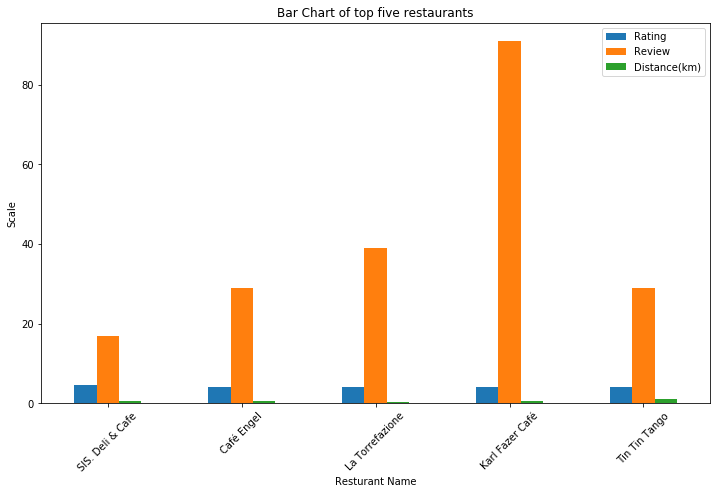

In [57]:
from matplotlib import pyplot

data = Top_five_Restaurants.head().filter(items=['Rating','Review','Distance(km)']) # takes data to plot

#create the figure instance
ax = data.plot(kind = 'bar', title = 'Bar Chart of top five restaurants', figsize=(12,7)) 
ax.set_xticklabels(Top_five_Restaurants.Resturant_name, rotation=45)
ax.set(xlabel='Resturant Name', ylabel='Scale')
pyplot.show()



### Observation:
In the above bar graph among top five restaurants, 'Karl Fazer Cafe' has the highest review counts where as 'SIS. Deli and Cafe ' has lowest. 'Piritta' restaurant seams little far away from the centre (Kaivokatu 1, 00101 Helsinki). Rating is almost same to every restaurants i.e. equal to or higher than 4.